# **1. Importar librerías y cargar datos**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# cargar dataset

df = pd.read_csv("/content/Argentina_demographics_69-22.csv")

# exploración inicial
print(df.head())
print(df.info())

   censo iso_3166-2_AR  provincia sexo rango_etario nativo_extranjero  \
0   1869            AR  ARGENTINA    M        05-09                 N   
1   1869            AR  ARGENTINA    M        10-14                 N   
2   1869            AR  ARGENTINA    M        00-04                 N   
3   1869            AR  ARGENTINA    M        15-19                 N   
4   1869            AR  ARGENTINA    M        20-24                 N   

   poblacion  Unnamed: 7  
0     124003         NaN  
1      99081         NaN  
2     129782         NaN  
3      87430         NaN  
4      69111         NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   censo              19008 non-null  int64  
 1   iso_3166-2_AR      19008 non-null  object 
 2   provincia          19008 non-null  object 
 3   sexo               19008 non-null  object 
 4 

# **2. Filtrado por año**

In [4]:
df_1869 = df[df["censo"] == 1869]
df_2022 = df[df["censo"] == 2022]

print("Población 1869:\n", df_1869.head())
print("Población 2022:\n", df_2022.head())

Población 1869:
    censo iso_3166-2_AR  provincia sexo rango_etario nativo_extranjero  \
0   1869            AR  ARGENTINA    M        05-09                 N   
1   1869            AR  ARGENTINA    M        10-14                 N   
2   1869            AR  ARGENTINA    M        00-04                 N   
3   1869            AR  ARGENTINA    M        15-19                 N   
4   1869            AR  ARGENTINA    M        20-24                 N   

   poblacion  Unnamed: 7  
0     124003         NaN  
1      99081         NaN  
2     129782         NaN  
3      87430         NaN  
4      69111         NaN  
Población 2022:
      censo iso_3166-2_AR  provincia sexo rango_etario nativo_extranjero  \
360   2022            AR  ARGENTINA    M        00-04                 N   
361   2022            AR  ARGENTINA    M        05-09                 N   
362   2022            AR  ARGENTINA    M        10-14                 N   
363   2022            AR  ARGENTINA    M        15-19            

# **3. Distribución por sexo**

In [6]:
sexo_2022 = df_2022.groupby("sexo")["poblacion"].sum()
print("Distribución por sexo 2022:\n", sexo_2022)

Distribución por sexo 2022:
 sexo
M    47215812
V    44021762
Name: poblacion, dtype: int64


# **4. Evolución histórica**

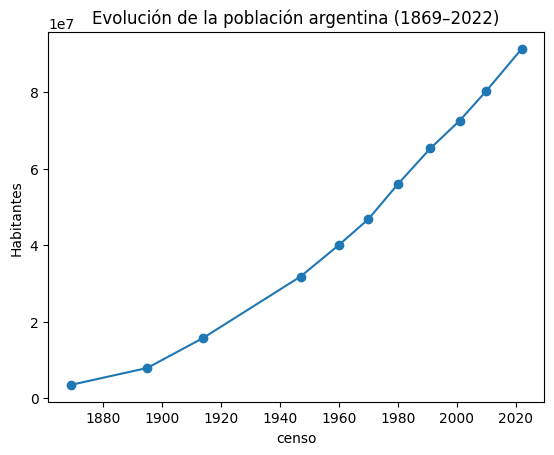

In [7]:
evolucion = df.groupby("censo")["poblacion"].sum()
evolucion.plot(marker="o", title="Evolución de la población argentina (1869–2022)")
plt.ylabel("Habitantes")
plt.show()

# **5. Pirámide poblacional 2022**

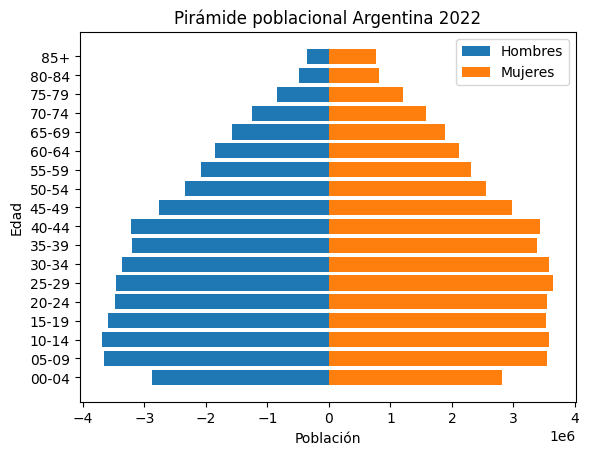

In [8]:
piramide = df_2022.pivot_table(index="rango_etario", columns="sexo", values="poblacion", aggfunc="sum")
piramide = piramide.fillna(0)

plt.barh(piramide.index, -piramide["V"], label="Hombres")
plt.barh(piramide.index, piramide["M"], label="Mujeres")
plt.xlabel("Población")
plt.ylabel("Edad")
plt.title("Pirámide poblacional Argentina 2022")
plt.legend()
plt.show()

# **6. Proporción relativa (porcentaje)**

In [9]:
df_2022["Porcentaje"] = df_2022["poblacion"] / df_2022["poblacion"].sum() * 100

print(df_2022.head())

     censo iso_3166-2_AR  provincia sexo rango_etario nativo_extranjero  \
360   2022            AR  ARGENTINA    M        00-04                 N   
361   2022            AR  ARGENTINA    M        05-09                 N   
362   2022            AR  ARGENTINA    M        10-14                 N   
363   2022            AR  ARGENTINA    M        15-19                 N   
364   2022            AR  ARGENTINA    M        20-24                 N   

     poblacion  Unnamed: 7  Porcentaje  
360    1392682         NaN    1.526435  
361    1752421         NaN    1.920723  
362    1758848         NaN    1.927767  
363    1720863         NaN    1.886134  
364    1716104         NaN    1.880918  


/tmp/ipython-input-2663578191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022["Porcentaje"] = df_2022["poblacion"] / df_2022["poblacion"].sum() * 100
